# Data exploration of the Signal Dataset

In [36]:
# loading modules

import pandas as pd
import torch
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [37]:
# loading data 

data = pd.read_csv("signal_20_obligatory1_train.tsv", sep='\t')

In [38]:


print(f"Available columns: {data.columns}")
print(f"Length of dataset: {len(data)}")
data.head()

Available columns: Index(['source', 'text'], dtype='object')
Length of dataset: 75141


,source,text
0,Uncova,Adeboye_PROPN Amosu_PROPN Tanzania_PROPN coach...
1,4 Traders,deal_ADJ type_NOUN Acquisition_NOUN deal_PROPN...
2,MyInforms,Santa_PROPN Clara_PROPN centenarian_NOUN break...
3,EIN News,12:05_NUM Gmt_PROPN Reflektor_NOUN Tape_NOUN s...
4,MyInforms,Midlands_PROPN lawmaker_NOUN distribute_VERB t...


In [39]:
data.source.value_counts(normalize=True)

MyInforms                       0.229036
Individual.com                  0.072078
4 Traders                       0.052688
NewsR.in                        0.047910
Reuters                         0.046526
Mail Online UK                  0.045767
App.ViralNewsChart.com          0.042839
Latest Nigerian News.com        0.042666
Yahoo! Finance                  0.040817
Town Hall                       0.037822
EIN News                        0.036917
Yahoo! News Australia           0.035853
Marketplace                     0.035653
Financial Content               0.035214
Wall Street Business Network    0.034668
Fat Pitch Financials            0.034362
Bloomberg                       0.033989
Market Pulse Navigator          0.032592
Uncova                          0.031647
BioSpace                        0.030955
Name: source, dtype: float64

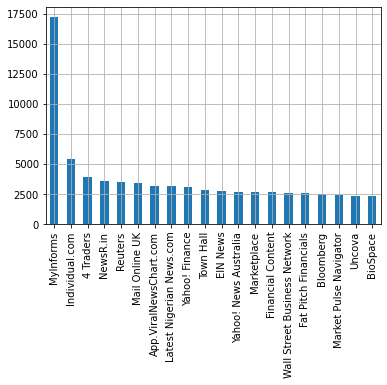

In [40]:
data.source.value_counts().plot(kind='bar')
plt.grid()
plt.show()

### Result:

We have one class (MyInforms) with 23% of the samples in our data

one class (Individual.com) with 7.2% of the samples in our data

one class (4 Traders) with 5.3% of the samples in our data

the rest of the classes account for between 3% and 5% of our data.

Since this split is so uneven, we need to be aware that MyInforms will have a disproportionate effect on our models

We also have a hypotetical baseline/mayority classifier with a 23% accuracy.

In [41]:
from string import punctuation

punc = ' ' + punctuation
for symbol in punc:
  mask = data['text'].str.contains(f'\{symbol}')
  print(f"Sym: {symbol}, count: {data[mask].size}")

Sym:  , count: 150264
Sym: !, count: 146
Sym: ", count: 434
Sym: #, count: 1214
Sym: $, count: 30798
Sym: %, count: 19862
Sym: &, count: 7492
Sym: ', count: 8472
Sym: (, count: 2484
Sym: ), count: 11648
Sym: *, count: 252
Sym: +, count: 11650
Sym: ,, count: 22792
Sym: -, count: 114170
Sym: ., count: 84872
Sym: /, count: 44366
Sym: :, count: 27018
Sym: ;, count: 520
Sym: <, count: 246
Sym: =, count: 1288
Sym: >, count: 1168
Sym: ?, count: 374
Sym: @, count: 19378
Sym: [, count: 262
Sym: \, count: 6
Sym: ], count: 376
Sym: ^, count: 84
Sym: _, count: 150282
Sym: `, count: 260
Sym: {, count: 26
Sym: |, count: 2554
Sym: }, count: 22
Sym: ~, count: 3048


In [46]:
# looking closer at the texts that contain a specific symbol

symbol = '@'  # the symbol you want to examine in detail goes here
mask = data['text'].str.contains(f'\{symbol}')
data[mask].head()

,source,text,len
9,Town Hall,Albany_ADV ny_PROPN sept_VERB 9_NUM 2015_NUM N...,629
26,Bloomberg,Host_VERB Foster_ADJ Ocular_ADJ Immunology_NOU...,271
40,Reuters,signal_ADJ hill_PROPN Publish_NOUN “the_PROPN ...,240
50,Town Hall,iPrytaneum_PROPN announce_VERB today_NOUN choo...,543
52,4 Traders,Headline_VERB Statutory_VERB 2015_NUM £m_NOUN ...,778


### Result
 Ok, so we have some email adresses, phone numbers and urls, these will likely not generalize well to unseen data, or they could be extremely informative, since I asume that for most of these they belong to people and entities connected to the site we want to classify

In [42]:
# looking closer at the texts that contain a specific symbol

symbol = ' '  # the symbol you want to examine in detail goes here
mask = data['text'].str.contains(f'\{symbol}')
data[~mask].head()

,source,text
1395,Latest Nigerian News.com,var_NOUN
17900,Latest Nigerian News.com,var_NOUN
20437,Latest Nigerian News.com,var_NOUN
22695,Latest Nigerian News.com,var_NOUN
34164,Latest Nigerian News.com,var_NOUN


###Result
Some of the texts from Latest Nigerian News, only contain a single "word"...

In [43]:
# num characters
data["char_len"] = data["text"].str.len()
data.head()

,source,text,len
0,Uncova,Adeboye_PROPN Amosu_PROPN Tanzania_PROPN coach...,137
1,4 Traders,deal_ADJ type_NOUN Acquisition_NOUN deal_PROPN...,128
2,MyInforms,Santa_PROPN Clara_PROPN centenarian_NOUN break...,127
3,EIN News,12:05_NUM Gmt_PROPN Reflektor_NOUN Tape_NOUN s...,41
4,MyInforms,Midlands_PROPN lawmaker_NOUN distribute_VERB t...,57


In [ ]:
# num words
data["num_words"] = data["text"].str.split(' ').str.len()
data.head()

In [44]:
data[data["num_words"] < 10]

,source,text,len
1046,Financial Content,New_PROPN York_PROPN view_VERB original_ADJ ve...,8
1395,Latest Nigerian News.com,var_NOUN,1
3797,MyInforms,lose_VERB hair_NOUN hand_NOUN decade_NOUN voic...,9
17900,Latest Nigerian News.com,var_NOUN,1
20437,Latest Nigerian News.com,var_NOUN,1
22695,Latest Nigerian News.com,var_NOUN,1
25137,Reuters,link_NOUN bit.ly/1gtffxa_PROPN note_VERB verif...,9
25620,Financial Content,London_NOUN view_VERB original_ADJ version_NOU...,7
26134,Financial Content,London_NOUN view_VERB original_ADJ version_NOU...,7
32673,Latest Nigerian News.com,Ngozi_PROPN Adichie_PROPN turn_NOUN 38_NUM Tod...,9
